In [43]:
import sys
import pandas as pd
import numpy as np
import datetime, time
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
#### Asisting configuration
sys.path.append("..")

In [5]:
pd.set_option('display.max_rows', 200)

In [68]:
df = pd.read_csv("../data/ds_challenge_apr2021.csv")

## limpieza

In [69]:
df['establecimiento']=df['establecimiento'].str.lower()
df['ciudad']=df['ciudad'].str.lower()
df['tipo_tc']=df['tipo_tc'].str.lower()
df['status_txn']=df['status_txn'].str.lower()
df['dispositivo']=df['dispositivo'].str.lower()

In [70]:
df = df.rename(columns={'ID_USER':'id_user'})
df['fecha'] = pd.to_datetime(df['fecha'])

In [71]:
df['tipo_tc'].loc[df['tipo_tc']=='física']='fisica'

/Users/ele/.pyenv/versions/dpa_env/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
df

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'andr...",super,merida,fisica,71000,51,aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'andr...",NaN,merida,virtual,71000,51,aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,guadalajara,virtual,94000,56,en proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'web'}",mpago,guadalajara,fisica,94000,56,aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,guadalajara,fisica,94000,56,aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-01-08,13,"{'model': 2020, 'device_score': 2, 'os': 'andr...",NaN,toluca,fisica,40000,56,aceptada,False,0.000000,7.461921,False
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'web'}",NaN,toluca,fisica,40000,56,aceptada,False,0.000000,9.418050,False
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'web'}",NaN,toluca,virtual,40000,56,aceptada,False,0.000000,5.023798,False
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': '.'}",NaN,toluca,fisica,40000,56,aceptada,False,2.418266,0.217644,False


In [16]:
df.isna().sum()

id_user                0
genero                 0
monto                  0
fecha                  0
hora                   0
dispositivo            0
establecimiento    10119
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
dtype: int64

## Valores nulos

Tenemos valores nulos en la ciudad y en establecimiento por lo que se buscará una imputación. 

In [22]:
X=df['establecimiento'].values.reshape(df.shape[0],1)

In [47]:
imputador = SimpleImputer(strategy="most_frequent")

In [48]:
imputador.fit(X)

SimpleImputer(strategy='most_frequent')

In [49]:
estable_impu = imputador.transform(X)

In [50]:
df['esta_impu']=estable_impu

<AxesSubplot:xlabel='establecimiento', ylabel='count'>

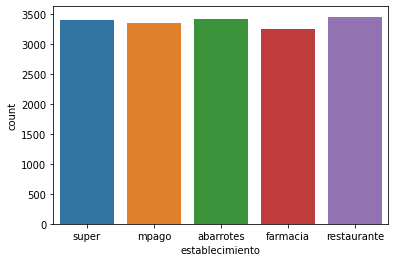

In [53]:
sns.countplot(x='establecimiento',data=df)

In [54]:
df

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,esta_impu
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'andr...",super,merida,física,71000,51,aceptada,False,60.834563,5.475111,False,super
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'andr...",NaN,merida,virtual,71000,51,aceptada,False,0.000000,1.774385,False,restaurante
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,guadalajara,virtual,94000,56,en proceso,False,0.000000,15.800753,False,restaurante
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'web'}",mpago,guadalajara,física,94000,56,aceptada,False,0.000000,7.670054,False,mpago
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,guadalajara,física,94000,56,aceptada,False,0.000000,2.541711,False,restaurante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-01-08,13,"{'model': 2020, 'device_score': 2, 'os': 'andr...",NaN,toluca,física,40000,56,aceptada,False,0.000000,7.461921,False,restaurante
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'web'}",NaN,toluca,física,40000,56,aceptada,False,0.000000,9.418050,False,restaurante
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'web'}",NaN,toluca,virtual,40000,56,aceptada,False,0.000000,5.023798,False,restaurante
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': '.'}",NaN,toluca,física,40000,56,aceptada,False,2.418266,0.217644,False,restaurante


### Onehotencoding

In [73]:
X = df['tipo_tc'].values.reshape(df.shape[0],1)

In [75]:
class_encoder = OneHotEncoder(categories="auto")

In [76]:
class_encoder.fit(X)

OneHotEncoder()

In [80]:
u = class_encoder.transform(X)

In [78]:
class_encoder.categories_

[array(['fisica', 'virtual'], dtype=object)]

In [79]:
X

array([['fisica'],
       ['virtual'],
       ['virtual'],
       ...,
       ['virtual'],
       ['fisica'],
       ['fisica']], dtype=object)

In [82]:
transformers = [('one_hot', OneHotEncoder(sparse = False, categories = "auto"),
                 ['tipo_tc', 'is_prime', 'status_txn'])]
col_trans = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)

In [83]:
df_regressors = col_trans.fit(df)
df_regressors

ColumnTransformer(n_jobs=-1,
                  transformers=[('one_hot', OneHotEncoder(sparse=False),
                                 ['tipo_tc', 'is_prime', 'status_txn'])],
                  verbose=True)

In [84]:
df_transformed = df_regressors.transform(df)

In [86]:
A = [sorted(df.tipo_tc.unique()),
    sorted(df.is_prime.unique()),
    sorted(df.status_txn.unique())]

colnames = sum(A, [])

In [87]:
final_df = pd.DataFrame(df_transformed, columns = colnames)

In [89]:
final_df['id']=df['id_user']

In [90]:
final_df

,fisica,virtual,False,True,aceptada,en proceso,rechazada,id
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
26970,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3999
26971,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3999
26972,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3999
26973,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3999


In [91]:
# cambiar true and false for categories
# poner en cero y uno fraude

### Selección de variables

In [93]:
X = final_df.drop(['fraude'],1)
y = final_df['fraude'].values

KeyError: "['fraude'] not found in axis"

In [ ]:
# ocuparemos un RF
classifier = RandomForestClassifier(oob_score=True, random_state=1234)

# separando en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# definicion de los hiperparametros que queremos probar

hyper_param_grid = {'n_estimators': [200], 
                    'max_depth': [2, 3],
                    'min_samples_split': [2, 3, 5, 7, 10]}

# ocupemos grid search!
gs = GridSearchCV(classifier, 
                           hyper_param_grid, 
                           scoring = 'precision_micro', # agregamos micro por ser multiclase
                           cv = 5, 
                           n_jobs = -1)

start_time = time.time()
gs.fit(X, y)
print("Tiempo de ejecución: ", time.time() - start_time)